In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d


Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [2]:
orthogonal_devices = pd.read_csv("rv_study/orthogonal_devices.csv")

In [3]:
orthogonal_devices

,Chip #,orifice_size,aspect_ratio,expansion_ratio,normalized_water_inlet,normalized_oil_inlet,normalized_orifice_length
0,1,75,1.0,2,2.0,2.0,1.0
1,2,75,1.5,3,2.5,2.5,1.5
2,3,75,2.0,4,3.0,3.0,2.0
3,4,75,2.5,5,3.5,3.5,2.5
4,5,75,3.0,6,4.0,4.0,3.0
5,6,100,1.0,3,3.5,4.0,2.0
6,7,100,1.5,4,4.0,2.0,2.5
7,8,100,2.0,5,2.0,2.5,3.0
8,9,100,2.5,6,2.5,3.0,1.0
9,10,100,3.0,2,3.0,3.5,1.5


REGIME 1
0.32708333333333334
{'Chip #': 1.0, 'orifice_size': 75.0, 'aspect_ratio': 1.0, 'expansion_ratio': 2.0, 'normalized_water_inlet': 2.0, 'normalized_oil_inlet': 2.0, 'normalized_orifice_length': 1.0, 'flow_rate_ratio': 12.0, 'capillary_number': 0.32708333333333334}
REGIME 2
0.2979166666666667
{'Chip #': 1.0, 'orifice_size': 75.0, 'aspect_ratio': 1.0, 'expansion_ratio': 2.0, 'normalized_water_inlet': 2.0, 'normalized_oil_inlet': 2.0, 'normalized_orifice_length': 1.0, 'flow_rate_ratio': 22.0, 'capillary_number': 0.2979166666666667}
0.2979166666666667
Dropped 154 points


TESTING
REGIME 1
0.23958333333333337
{'Chip #': 2.0, 'orifice_size': 75.0, 'aspect_ratio': 1.5, 'expansion_ratio': 3.0, 'normalized_water_inlet': 2.5, 'normalized_oil_inlet': 2.5, 'normalized_orifice_length': 1.5, 'flow_rate_ratio': 3.666666666666667, 'capillary_number': 0.23958333333333337}
REGIME 2
0.10833333333333334
{'Chip #': 2.0, 'orifice_size': 75.0, 'aspect_ratio': 1.5, 'expansion_ratio': 3.0, 'normalized_w

Text(0.5, 1.0, 'Performance Span of Orthogonal Devices')

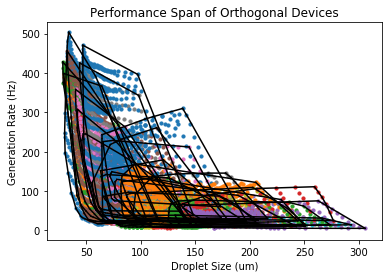

In [4]:
devices = orthogonal_devices.to_dict(orient='records')
score = []
size_score = []
rate_score = []
all_points = {}
hulls = []

for device in devices:
    features = device.copy()
    chip_num = features["Chip #"]
    del features["Chip #"]
    sizes, rates = sweep_results(device, sweep_size=25, jet_drop=True, ca_range=[.05, .4])
    size_score.append(np.max(sizes) - np.min(sizes))
    rate_score.append(np.max(rates) - np.min(rates))
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    all_points[chip_num] = points
    hull = ConvexHull(points)
    hulls.append(hull)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    score.append(hull.volume)
orthogonal_devices["hull_object"] = hulls
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
plt.title("Performance Span of Orthogonal Devices")

(0, 500)

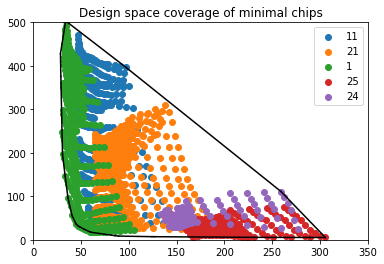

In [5]:
entire_space = []
for key in all_points.keys():
    entire_space.extend(all_points[key])
entire_space= np.array(entire_space)
design_space_hull = ConvexHull(entire_space)

plt.scatter(all_points[11][:,0], all_points[11][:,1])
plt.scatter(all_points[21][:,0], all_points[21][:,1])
plt.scatter(all_points[1][:,0], all_points[1][:,1])
#plt.scatter(all_points[22][:,0], all_points[22][:,1])
#plt.scatter(all_points[3][:,0], all_points[3][:,1])

plt.scatter(all_points[25][:,0], all_points[25][:,1])
plt.scatter(all_points[24][:,0], all_points[24][:,1])

plt.legend(["11", "21", "1", "25", "24"])
plt.title("Design space coverage of minimal chips")
for simplex in design_space_hull.simplices:
    plt.plot(entire_space[simplex, 0], entire_space[simplex, 1], 'k-')

plt.xlim([0, 350])
plt.ylim([0, 500])

In [7]:
# Making minimal setup
target = 0.99
coverage = 0.0
hulls = orthogonal_devices["hull_object"].to_dict()
devices_left = len(hulls)
points_left = []
points_used = []
used = []
areas = list(np.zeros(len(hulls)))

for key in all_points.keys():
    points_left.extend(all_points[key])
area_left = ConvexHull(points_left).volume
design_space_area = area_left

count = 1
while coverage <= target or count < 25:
    ## 1.1 Calculate area of each device hull
    for key in hulls:
        if key not in used:
            areas[key] = hulls[key].volume
    ## 1.2 pick hull with maximum area
    max_chip = areas.index(max(areas)) #requires 2 iterations but list is small
    print(max_chip)
    print(used)
    print(areas)
    used.append(max_chip)
    ## 1.3 remove all points WITHIN hull (& add to min dataset). This is for the full devices and for any overlaps
    points_left = []
    for chip_num in all_points.keys():
        points_placeholder = []
        for i, point in enumerate(all_points[chip_num]):
            if not in_hull(point, hulls[max_chip].points):
                points_placeholder.append(point)
            else:
                points_used.append(point)
        all_points[int(chip_num)] = np.array(points_placeholder) # Delete point if it is inside of the current point
        points_left.extend(all_points[chip_num])
        if chip_num-1 in used or len(all_points[chip_num]) < 3:
            areas[int(chip_num)-1] = -1
            if chip_num - 1 not in used:
                used.append(chip_num-1)
        else:
            hulls[int(chip_num)-1] = ConvexHull(all_points[chip_num])
        
    area_left = ConvexHull(points_used).volume
    coverage = area_left/design_space_area
    print("Iteration %f, Coverage %f" % (count, coverage))
    count+=1
    if count > 25:
        break
    if coverage >= 0.99:
        break
    
    
# 1. Calculate device area intersect with design space hull -> harder than thought? Can I just do this with a discrete method...? (by parts)
## 1.4 Show amount coverage with existing device
## 1.5 Iterate



# 2. Pick Max intersect value
# 3. Subtract from current hull
# 4. Iterate over it

10
[]
[19731.29532080862, 18391.20965205684, 19985.600284374763, 13981.773879837623, 12299.549336392869, 17017.300086607527, 17963.429848342497, 20959.413688070825, 10450.098447510487, 8083.4424589343325, 27684.91260692504, 11351.868398084058, 11687.432800626146, 12427.638163168296, 12357.346184964617, 18831.960102456815, 13400.942970268878, 11373.330430797228, 11840.320063904981, 3291.154122790649, 27019.128753412017, 17209.638030393948, 8296.747993628926, 9511.926415407404, 8564.20797139013]
Iteration 1.000000, Coverage 0.392255
20
[10]
[17708.459999733015, 15031.707130247249, 18808.077506393518, 13063.223266839384, 9843.7552702505, 15551.882681467347, 15186.11303970325, 155.22330648778, 5903.463898844196, 5726.742448434897, -1, 6235.463867448329, 7191.217660247728, 8164.899462199559, 9248.660515808391, 9305.219060426809, 3257.371392101487, 9364.042587713615, 10025.98899124668, 3291.154122790649, 21158.09410683916, 11417.731421221397, 7960.986614674584, 9137.853256618502, 8039.955145

In [12]:
orthogonal_devices["score"] = score
orthogonal_devices["size_score"] = size_score
orthogonal_devices["rate_score"] = rate_score


In [13]:
to_save = orthogonal_devices
del to_save["hull_object"]

In [14]:
to_save
to_save.to_csv("2021021_versatility_scores.csv")

Text(0, 0.5, 'Range (max - min)')

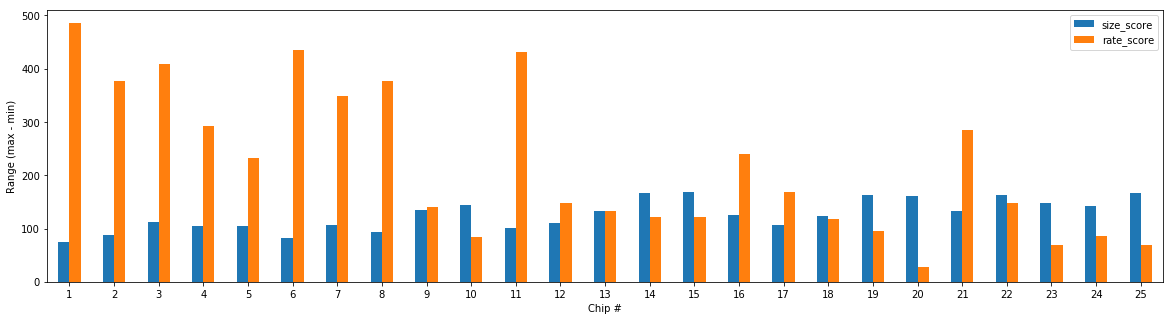

In [15]:
ax = orthogonal_devices.plot.bar(x="Chip #", y=["size_score","rate_score"], rot=0, figsize=[20,5])
ax.set_ylabel("Range (max - min)")

Text(0, 0.5, 'Convex Hull area')

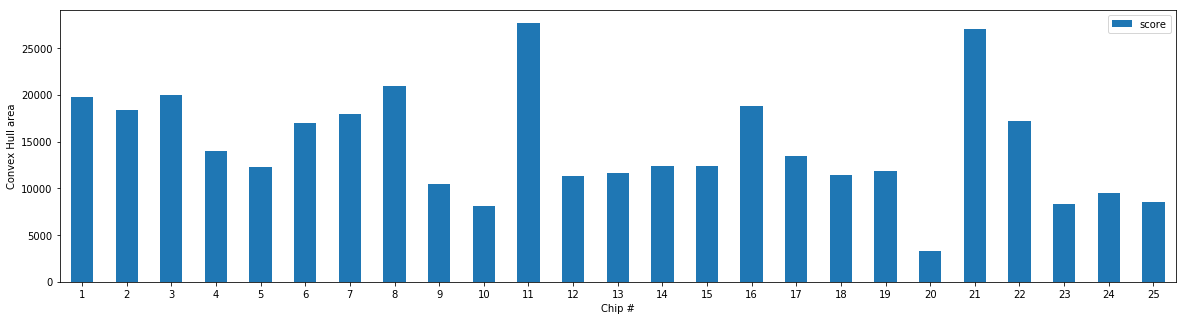

In [16]:
ax = orthogonal_devices.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
ax.set_ylabel("Convex Hull area")